<a href="https://colab.research.google.com/github/reginaldooriguella/DM/blob/master/Analisando_os_Dados_do_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - New York City

Questão 3. Visando analisar a variação do preço de locação dos hosts, descreva de forma
clara e organizada, o tratamento de dados você utilizaria sobre o dataset em questão,
englobando pré-processamento, análise textual, algoritmos de mineração de dados,
ferramentas de data discovery ou qualquer outra forma/técnica que seja de seu
conhecimento. Para esta questão será considerado o processo aplicado sobre o conjunto
de dados, visando extrair informações relevantes sobre os dados que possam influenciar no
preço de locação do host. (2 pontos)

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos e correlação entre eles.** 



## Obtenção dos Dados


A análise presente neste artigo explorou dados retirados exclusivamente do banco de dados fornecido pelo próprio Airbnb, através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

De modo que vamos analisar alguns dados básicos referentes à cidade de Nova Iorque, utilizaremos o pacote de dados abaixo:
* **'listings.csv'** - *Summary information and metrics for listings in New York City (good for visualisations) 

In [1]:
# Importar os pacotes necessários para o projeto:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Em seguida, devemos importar o pacote com os dados que serão explorados:
df = pd.read_csv("https://raw.githubusercontent.com/reginaldooriguella/DM/master/AB_NYC_2019.csv")

## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

### Qual volume de dados que estamos analisando? 
Para determinarmos uma direção para nossa análise, precisamos saber qual o volumes de dados que temos à disposição. Através do comando abaixo é sabido que temos **48895 linhas** e **16 colunas** contendo informações. 


In [3]:
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}".format(df.shape[1]))

Variáveis:	 48895
Entradas:	 16


Já sabemos que teremos 16 itens de 48895 linhas para análise mas, **quais são essas 16 variáveis?**

Através do comando abaixo, conseguimos listar o tipo de informação que é fornecida para cada variável:

In [33]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Agora que já temos uma legenda para as entradas, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas:

In [9]:
# Mostrar as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É possível que hajam variáveis que não estão contempladas nos dados, e é importante sabermos isso a fim de desconsiderarmos as mesmas quando iniciarmos as análises. 

In [10]:
#Analisando as 5 primeiras entradas, conforme o comando abaixo, podemos ver que não temos campos vazios até o momento:

df.isnull().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# A dúvida é: será que essa é a realidade das 809584 células? 
# Vamos analisar o número de células vazias por colunas:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

reviews_per_month                 20.558339
last_review                       20.558339
host_name                          0.042949
name                               0.032723
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Vemos que as colunas "reviews_per_month" e "last_review" possuem aproximadamente 20% das suas entradas sem informações.

### **Q3. Qual o tipo de distribuição das variáveis?** 

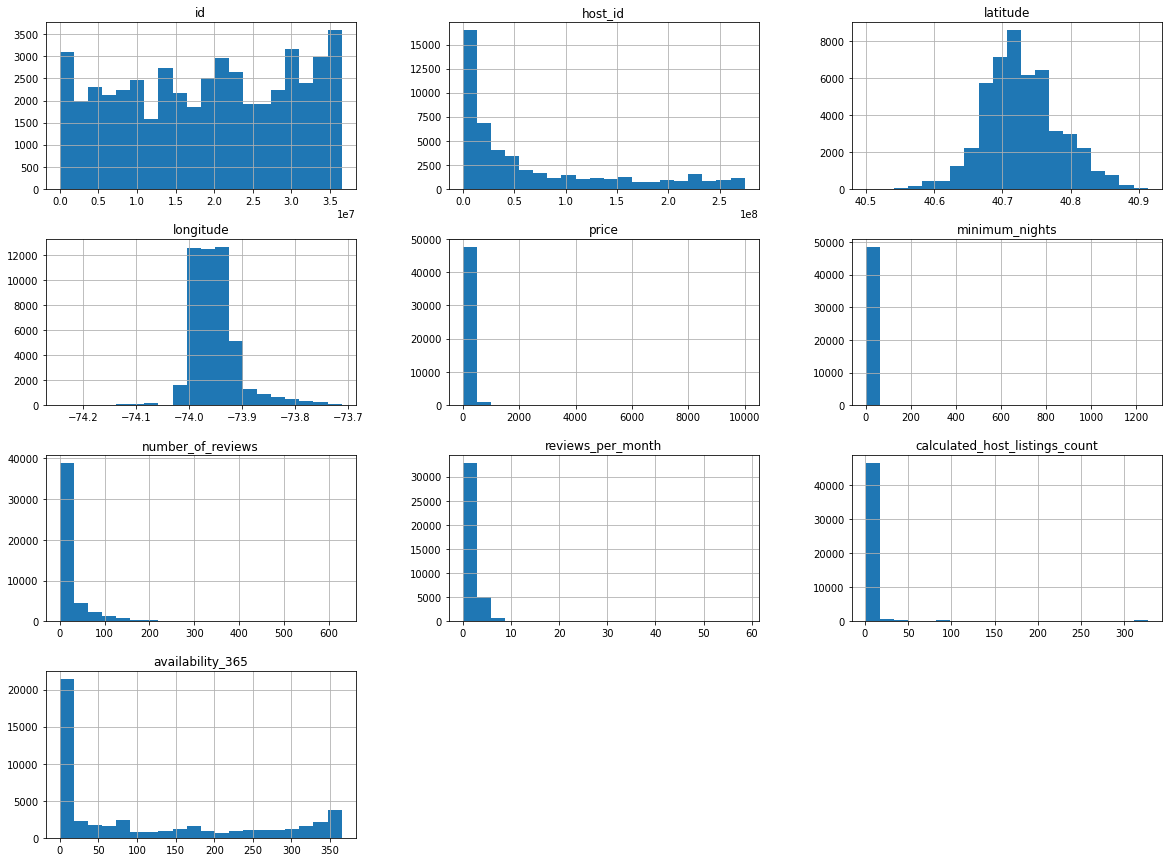

In [11]:
# A fim de analisarmos como as variáveis estão distribuídas, vamos plotar o histograma das mesmas conforme abaixo:
df.hist(bins=20, figsize=(20,15));

# Q4. Outliers

Os outliers são dados que distorcem a análise e podem ser reconhecidos inicialmente nos histogramas que plotamos acima. Por exemplo: '*minimum_nights*'. Ao olhar o gráfico, ele não nos diz muita coisa em função dos valores contemplados no eixo X.


Temos outras formas de verificar outliers, são elas:

*   Resumo estatístico por meio do método *describe()*
*   Plotar boxplots para a variável.




In [12]:
# Resumo estatístico:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Com os dados acima podemos concluir inicialmente que:


*  O preço médio das acomodações é de USD152.72, o preço máximo é USD10,000.00, e que 75% das acomodações custam até USD175.00, logo, esse "max" está contribuindo na distorção do valor apresentado no histograma; 
*   O mínimo de noites em média é de 7.02, porém o máximo é de 1250 noites, claramente nosso histograma será distorcido com esse outlier.

Explorando um pouco mais esses dados através de boxslopts individuais para cada um:

price: valores acima de USD2000
86 entradas
0.1759%


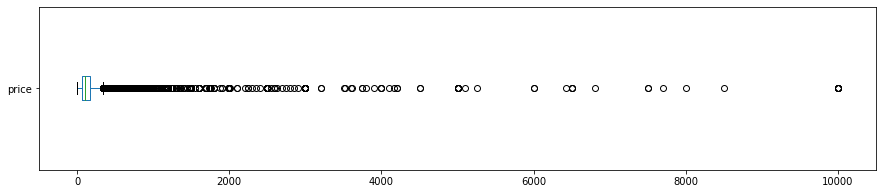

In [13]:
# Bloxplot "Price":
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show

# Ver quantidade de entradas cujo valores estão acima de USD2,000:
print("price: valores acima de USD2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

Podemos ver que a grande maioria dos preços das diárias é de até USD2,000, e que valores que fogem disso, representam apenas 0.1759% de todas as entradas.

minimum_nights: valores acima de 30
747 entradas
1.5278%


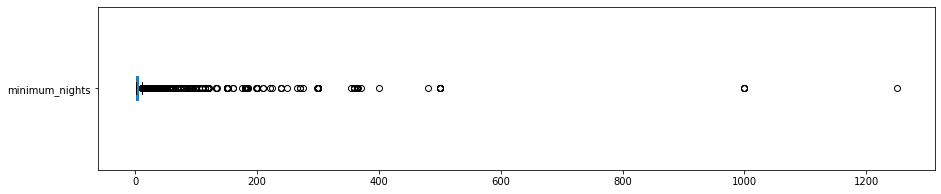

In [15]:
# Bloxplot "Minimum_nights":
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show

# Ver quantidade de entradas cujo valores estão acima de 30:
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Na imagem acima concluímos que o número mínimo de diárias da maioria das entradas é de até 30, sendo que no resumo anterior vimos que a média dessa variável é de 7,03. As entradas que fogem dessa média representam menos de 2% do total.

# Histograma sem outliers
Agora que já conhecemos os valores distorcem os histogramas das variáveis "price" e "minimum_nights, vamos limpar o DataFrame delas e plotar novamente os histogramas: 

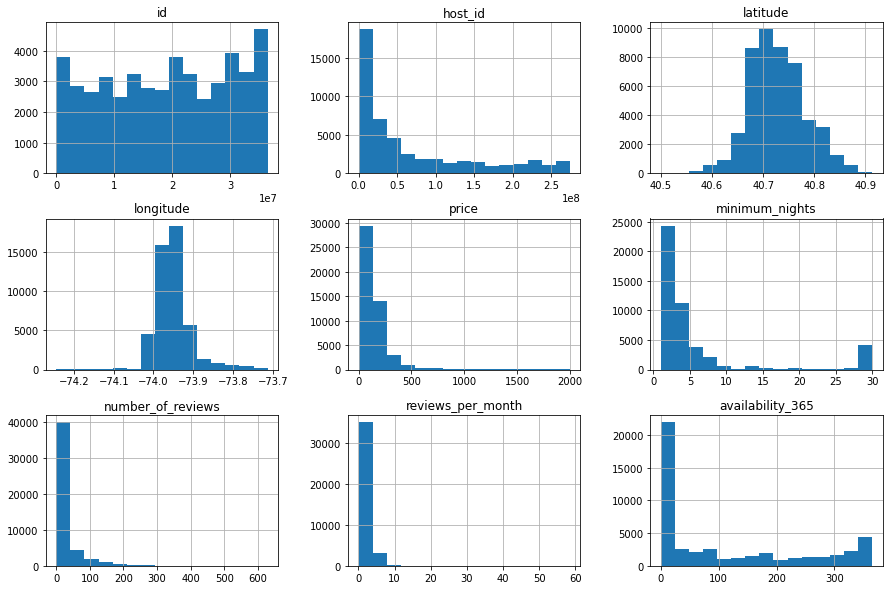

In [16]:
# Remover os outliers em um novo DataFrame:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Vamos remover 'calculated_host_listings_count' porque não é relevante para nossa análise:
df_clean.drop('calculated_host_listings_count', axis=1, inplace=True)

# Plotar o novo histograma:
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Sabemos que quase 100% dos imovéis tem uma diária que custa até USD2,000.00. 

Mas qual seria a média de preço de todas as entradas? Vejamos abaixo:

In [17]:
# Ver a média da coluna `price``
df['price'].describe()

df.price.mean()

152.7206871868289

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [18]:
# Matriz de correlação:
df_clean = df.copy()
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


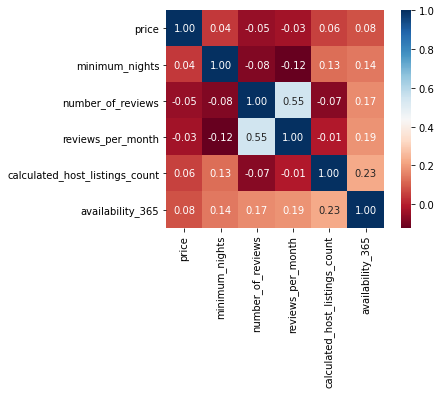

In [19]:
# Heatmap a partir da matriz de correlação:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**


Com o comando abaixo podemos ver que o tipo de imóvel com mais ofertas em NYC é "Entire home/apt", seguido pela opção "Private Room".

In [20]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Vejamos em percentuais o quanto isso representa:

In [21]:
df.room_type.value_counts() / df_clean.shape[0]*100


Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


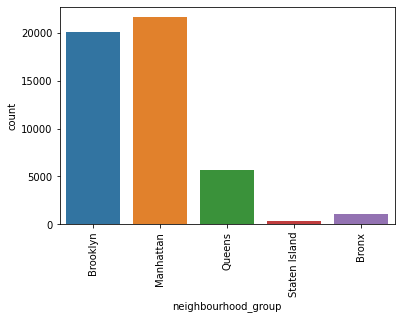

In [34]:
# verificar número de locações por distrito
df['neighbourhood_group'].value_counts()
sns.countplot(df['neighbourhood_group'])
plt.xticks(rotation=90,horizontalalignment="center");

### **Q6. Qual a localidade mais cara de Nova York?**
Através dos dados fornecidos, vamos descobrir qual o bairro mais caro para se hospedar em Nova York:



In [37]:
# ver os preços por Distrito
df_clean.groupby(df['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

Como já era de se esperar, Manhattan é o Distrito mais caro de Nova Iorque justamente por ser a região mais visitada (e desejada) por turistas de todos os continentes.Vamos observar se a quantidade de entradas tornou-se mais significativa:

In [38]:
# verificar a quantidade de entradas para os 5 Distritos principais de Nova Iorque
print('Manhattan\t',df_clean[df_clean['neighbourhood_group'] == 'Manhattan'].shape[0])
print('Brooklyn\t',df_clean[df_clean['neighbourhood_group'] == 'Brooklyn'].shape[0])
print('Staten Island\t',df_clean[df_clean['neighbourhood_group'] == 'Staten Island'].shape[0])
print('Queens\t\t',df_clean[df_clean['neighbourhood_group'] == 'Queens'].shape[0])
print('Bronx\t\t',df_clean[df_clean['neighbourhood_group'] == 'Bronx'].shape[0])

Manhattan	 21661
Brooklyn	 20104
Staten Island	 373
Queens		 5666
Bronx		 1091


Conforme resultado acima, agora temos uma massa de dados por Distrito e que nos permite extrair informações com maior confiabilidade.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto em um gráfico de dispersão. Para isso, considera-se x=longitude e y=latitude.

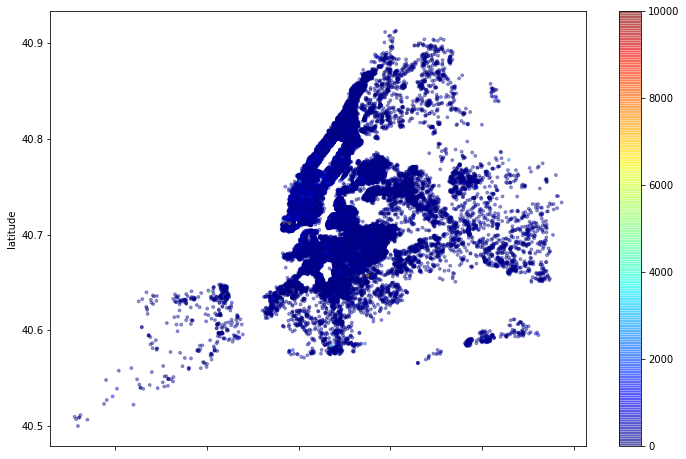

In [39]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
cmap=plt.get_cmap('jet'), figsize=(12,8));

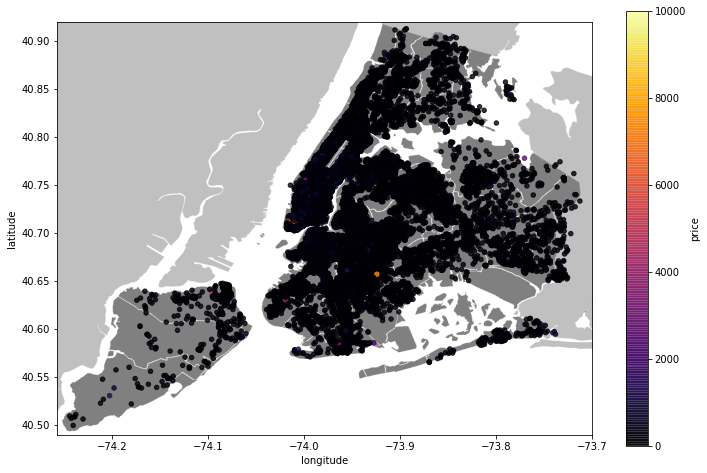

In [40]:
import urllib
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
plt.imshow(plt.imread(i), zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
df_clean.plot(
    ax=ax,
    zorder=1,
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O mínimo de noites na média das entradas é de 7 noites, também vale a pena considerar essa informação na hora de pensar em conhecer a cidade!

In [24]:
df_clean.minimum_nights.mean()

7.029962163820431

## Conclusões


Após uma análise inicial do dataset pudemos verificar que existem valores extremos que podem afetar a interpretação dos resultados.

Mesmo com uma base de dados na versão resumida, constata-se pelo gráfico de latitudes/longitudes que o distrito de Manhattan é o mais caro para se hospedar. Porém com valores acima da média, ainda é o local mais procurado de Nova Iorque.

Hospedar-se no distrito do Queens pode ser uma boa relação custo/benefício, por estar situado entre o aeroporto JFK e a ilha de Manhattan.



